# EXPLORING DATA

In [2]:
# libraries to describe de data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk # imports the natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer 
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime
from PIL import Image
from nltk.probability import FreqDist
import random
import re


plt.style.use('ggplot')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gustavovergara238/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data understanding

### EDA: Tweets 2019

In [3]:
df_tweets = pd.read_csv('data/2019.csv') # read the csv file

In [4]:
df_tweets.shape # shows the number of rows and columns

(17698, 9)

In [5]:
df_tweets.info() # shows the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17698 entries, 0 to 17697
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   full_text        17698 non-null  object
 1   user             17698 non-null  object
 2   location         17698 non-null  object
 3   date             17698 non-null  object
 4   tweet_id         17698 non-null  int64 
 5   number_rt        17698 non-null  int64 
 6   number_likes     17698 non-null  int64 
 7   number_reply     17698 non-null  int64 
 8   conversation_id  17698 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [6]:
df_tweets.describe() # shows the mean, std, min, max, etc. of each column

,tweet_id,number_rt,number_likes,number_reply,conversation_id
count,1.769800e+04,17698.000000,17698.000000,17698.000000,1.769800e+04
mean,1.147017e+18,2.145101,7.685614,0.606848,1.146736e+18
std,3.824295e+16,25.705813,97.046305,7.947419,3.908216e+16
min,1.083115e+18,0.000000,0.000000,0.000000,6.265645e+17
25%,1.111778e+18,0.000000,0.000000,0.000000,1.111776e+18
50%,1.145119e+18,0.000000,0.000000,0.000000,1.145118e+18
75%,1.178459e+18,0.000000,2.000000,0.000000,1.178457e+18
max,1.244776e+18,1650.000000,6946.000000,794.000000,1.244776e+18


#### Full text

In [7]:
df_tweets['full_text'].str.len().describe()

count    17698.000000
mean       142.696293
std         79.503198
min          7.000000
25%         77.000000
50%        126.000000
75%        208.000000
max        689.000000
Name: full_text, dtype: float64

In terms of tweet text length measured in characters, we found an average of 143 characters, a maximum of 689 characters and a minimum of 7 characters.

In [8]:
full_text_char = df_tweets['full_text'].str.len()

In [9]:
print(full_text_char.quantile(0.05))
print(full_text_char.quantile(0.25))
print(full_text_char.quantile(0.5))
print(full_text_char.quantile(0.75))
print(full_text_char.quantile(0.95))

37.0
77.0
126.0
208.0
278.0


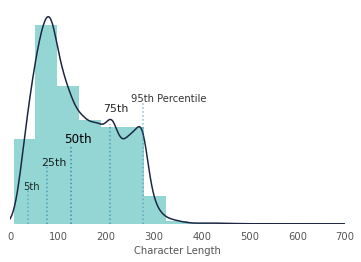

In [10]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_char.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

# Plot KDE
full_text_char.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_char.quantile(0.05), full_text_char.quantile(0.25), full_text_char.quantile(0.5), full_text_char.quantile(0.75), full_text_char.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-10, 0.001, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-13, 0.0017, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-13, 0.0024, "50th", size = 12, alpha = 1)
ax.text(quant_75-13, 0.0033, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-25, 0.0036, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Character Length",size = 10) 
ax.set_xlim(0, 700)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

According to the graph above, we can find that the distribution is skewed to the right. There are more sensitive or controversial topics that require a greater extension of characters. For this, we move on to analyze the words within the tweet.

In [11]:
full_text_words=df_tweets['full_text'].str.split().str.len()

In [12]:
full_text_words.describe()

count    17698.000000
mean        21.930105
std         12.619929
min          1.000000
25%         12.000000
50%         19.000000
75%         31.000000
max         75.000000
Name: full_text, dtype: float64

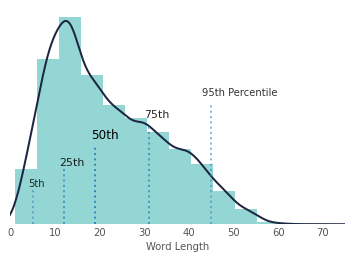

In [13]:
fig, ax = plt.subplots(figsize = (6,4))


# Plot
    # Plot histogram
full_text_words.plot(kind = "hist", density = True, alpha = 0.65, bins = 15,color='#5BC0BE') # change density to true, because KDE uses density
#5BC0BE
#6FFFE9
#CCC9DC

#kde
full_text_words.plot(kind = "kde",color='#1C2541')
#0C1821
#1B2A41
#1C2541

# Calculate percentiles
quant_5, quant_25, quant_50, quant_75, quant_95 = full_text_words.quantile(0.05), full_text_words.quantile(0.25), full_text_words.quantile(0.5), full_text_words.quantile(0.75), full_text_words.quantile(0.95)
# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":")
# Text on the lines
ax.text(quant_5-1, 0.007, "5th", size = 10, alpha = 0.8)
ax.text(quant_25-1, 0.011, "25th", size = 11, alpha = 0.85)
ax.text(quant_50-1, 0.016, "50th", size = 12, alpha = 1)
ax.text(quant_75-1, 0.020, "75th", size = 11, alpha = 0.85)
ax.text(quant_95-2, 0.024, "95th Percentile", size = 10, alpha =.8) 


# X #
ax.set_xlabel("Word Length",size = 10) 
ax.set_xlim(0, 75)

# Y #
#ax.set_ylim(0, 1)

# Overall #
#ax.set_title("Character Length Distribution",size=14, pad=20)

# Remove y ticks
ax.set_yticks([])
    # Relabel the axis as "Frequency"
ax.set_ylabel("")

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

plt.style.use("bmh") 

# Remove ticks and spines
ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

   
plt.show()

In terms of tweet text length measured in words, we found an average of 22 words, a maximum of 75 words and a minimum of 1 word. 

We observe the same behavior when we look at the distribution in terms of words. We will proceed to review the tweets that contain the minimum and maximum number of words.

In [14]:
data_tweet=df_tweets.copy() # copy the dataframe
data_tweet['num_words']=df_tweets['full_text'].str.split().str.len() # create a new column with the number of words in each tweet
data_tweet['num_char']=df_tweets['full_text'].str.len() # create a new column with the number of characters in each tweet

In [15]:
data_tweet['num_words'].value_counts().reset_index().sort_values(by='index',ascending=False) # shows the number of words in each tweet

,index,num_words
64,75,1
63,69,1
65,67,1
62,65,1
59,62,3
...,...,...
24,5,323
31,4,277
42,3,163
46,2,123


In [16]:
data_tweet[['full_text','num_words']][data_tweet['num_words']<=2].sort_values(by='num_words').sample(10, random_state=6)

,full_text,num_words
8218,@from__oz Medellín,2
3254,@SaqueLargoWin Medellín,2
7731,@Ricardo_Arjona Medellín,2
9375,@BillieEilishCOL Medellín,2
10915,Medellín 😍,2
3327,@SaqueLargoWin Medellín,2
10308,Medellín!!!! 😘,2
1537,"Medellín, Extremadura",2
11764,Medellín.,1
11466,😍 Medellín,2


In [17]:
data_tweet[['full_text','num_words']][data_tweet['num_words']<=2].sort_values(by='num_words').sample(10) # shows the tweets with 75 words or 1 word

,full_text,num_words
3451,@SaqueLargoWin Medellín,2
11466,😍 Medellín,2
16207,Medellín😣💔,1
17564,in Medellín,2
14707,Personajillo funesto.,2
2287,@PokerStarsLatam Medellín.,2
3401,@SaqueLargoWin Medellín,2
6295,Medellín. Colombia.,2
9572,@Bypipee Medellín.,2
2432,Solo Medellín,2


We can observe how the tweets with fewer words (2 or less), the word "Medellin" is the most recurrent. This is because it is our main search topic. In the case of tweets with exactly two words, "Medellin" appears accompanied by a mention, an emoticon, a year, among others.

In [18]:
data_tweet.loc[8374,'full_text'] # shows the tweet with the index 8374

' @Alex881490101 @Ceballitos1 @ramirezdo @Angeljosew1 @RadicalEd @lilipiedadvalle @LAPacifiKA @LeilaChujfi @SerHRodriguez @ANNALVAREZG @MiremosaVer @juancadelgado @gener_usuga @MonoMeLlaman @edywfernandez @JAtecor @merv59 @JUANCAELBROKY @ClavijoAndres83 @Marianiniecheve @JohaFuentes @gurozu @MauricioGalin11 @LaMamert4 @DIDASKALOSW @InTweetiva @lbertoortiz @mauronuma @DanielSamperO @Julianaramirez6 @AlvaroUribeVel Esos uribeños que reciclan todo lo que dice su amo me hacen reír mucho. Es como hablar con un lorito. «Angelito quiere cacao» jajajajajaja Debería seguir lavando baños y no perder el tiempo defendiendo a un narcoterrorista excartel de Medellín. Un abrazo a todos!'

In [19]:
list=[65,67,69,75]
data_large=data_tweet[['tweet_id','full_text','num_words']][(data_tweet['num_words']).isin(list)].sort_values(by='num_words') # shows the tweets with the words 65, 67, 69

In [20]:
data_large

,tweet_id,full_text,num_words
15969,1122991773259841536,@baloncentralofi @MillosDColombia @Millonario...,65
3989,1126634066302984192,@transmetrobaq @UTSistur @pabvic1 @AMBQuilla ...,67
4809,1130237922073038849,@HerliRodriguez2 @CarrillonavasG @indignada20...,69
8374,1174791915809792000,@Alex881490101 @Ceballitos1 @ramirezdo @Angel...,75


In [21]:
print(data_large.iloc[0,1],"\n"+"-"*20,data_large.iloc[1,1],"\n"+"-"*20,data_large.iloc[2,1],"\n"+"-"*20,data_large.iloc[3,1])

 @baloncentralofi @MillosDColombia @MillonariosEste @acordellat @AficionColombia @CuyigansPasto @ConRola @Elyorkalvarez @nixoncarranza Así quedan los 8, el Once tiene buena diferencia de gol y el 9, 10 y 11 tienen partidos muy duros, difícil que sumen los 6, inclusive si esos 3 pierden entre semana ya quedan definidos los 8, a Medellín le tocaría ganar los dos partidos y esperar que el Once no sume en Sta Marta. 
--------------------  @transmetrobaq @UTSistur @pabvic1 @AMBQuilla @Metrocaribe @OperadorUno1 @luchovoltios @SOBUSA_SA @AtlanticoEmi @jorgecura1070 @CaracolBquilla @HENRYFOREROJ @ExtraNoticiasCo Ajá que culpa tengo yo sí así es la historia del metro Medellín. Aún así si fuera como me dices, digamos q sostiene, porque los metros q tienen más de 20 años y los metroplus q tienen casi la misma edad q los de bquilla, los de TM se ven acabados? Responda! Y estaciones 
--------------------  @HerliRodriguez2 @CarrillonavasG @indignada2016 @patriciam265 @paula30202449 @Setulus1 @Malupr

When looking at the texts with greater word length, we highlight two points: 
1. The large use of mentions using the at-word extends the length of the tweet and would not provide relevant information for sentiment analysis so deletion could be considered.
2. Something to keep in mind when including Medellin in the text of the tweet is that this may not only refer to the city, but also to the soccer team "Deportivo Independiente Medellin" so we must know how to differentiate this if we want to draw conclusions.
3. The tweets with fewer words associate their text with the word "Medellin" accompanied by something else, this alone would not be relevant for our analysis so it could be given a special treatment. 

#### Number of likes

In [22]:
data_tweet.sort_values(by='number_likes',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,num_words,num_char
11050,Alejandro Gómez @AlejandroGL2014 es médico y ...,ClaudiaLopez,"Bogotá, D.C., Colombia",2019-12-09 22:50:46+00:00,1204171557049901058,821,6946,369,1204171557049901058,45,280
16498,Miren la diferencia entre una estación de Tra...,luismorales0621,"Bogotá, D.C., Colombia",2019-03-29 22:35:48+00:00,1111758887592648705,1650,4283,794,1111758887592648705,28,174
14388,Nuestra respuesta ante el odio y la homofobia...,justgerson,"Sahagún, Colombia",2019-06-29 23:31:59+00:00,1145112709794533377,781,3953,87,1145112709794533377,18,113
1278,"""Todos debemos tratarnos con amor"": el padre ...",NoticiasRCN,"Santa Marta, Colombia",2019-02-09 22:03:19+00:00,1094356094913335296,1129,3934,86,1094356094913335296,21,134
14266,Quiero una camisa con esta foto. Pareja de ha...,JulianaBoteroM,"Sahagún, Colombia",2019-06-29 23:55:47+00:00,1145118695980773382,297,3355,21,1145118695980773382,17,100
...,...,...,...,...,...,...,...,...,...,...,...
7490,@AlvaroUribeVel Ese al que no le gustan los t...,johnferreirac,"Medellín, Colombia",2019-08-19 23:15:13+00:00,1163590271717838848,0,0,0,1163557394393305088,14,81
7492,Esta Sonando....Madonna - Medellín...... en e...,DjNuNRadio,"Medellín, Colombia",2019-08-19 23:14:53+00:00,1163590186963537921,0,0,0,1163590186963537921,16,132
7493,GOBERNACIÓN DE ANTIOQUIA: FIRMA PARA QUE EL T...,magaoca8552,"Medellín, Colombia",2019-08-19 23:14:52+00:00,1163590181557088256,0,0,0,1163590181557088256,26,154
7494,You Are Always On My Mind - #ElvisPresley #Es...,MoonWalkers_off,"Medellín, Colombia",2019-08-19 23:14:39+00:00,1163590129161789441,1,0,0,1163590129161789441,25,242


In [23]:
data_tweet.loc[11050,"full_text"] # shows the first tweet

' Alejandro Gómez @AlejandroGL2014 es médico y especialista en salud y finanzas de EAFIT. Fue director de Salud Pública en Medellín, gerente de la red hospitalaria de esa ciudad, y Director Nacional de Nutrición del ICBF y será el nuevo Secretario de Salud de Bogotá. #BogotáCambia'

#### Number of reply

In [24]:
data_tweet.sort_values(by='number_reply',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,num_words,num_char
16498,Miren la diferencia entre una estación de Tra...,luismorales0621,"Bogotá, D.C., Colombia",2019-03-29 22:35:48+00:00,1111758887592648705,1650,4283,794,1111758887592648705,28,174
11050,Alejandro Gómez @AlejandroGL2014 es médico y ...,ClaudiaLopez,"Bogotá, D.C., Colombia",2019-12-09 22:50:46+00:00,1204171557049901058,821,6946,369,1204171557049901058,45,280
8864,En Medellín se avecina un cambio en la políti...,Pfrobledo,"Yopal, Colombia",2019-09-09 22:11:17+00:00,1171184325599141889,471,1494,224,1171184325599141889,36,244
14589,Este es el hombre señalado de destruir la ban...,ELTIEMPO,"Sahagún, Colombia",2019-06-29 22:56:40+00:00,1145103818629271552,38,134,211,1145103818629271552,13,74
6807,La falta que nos ha hecho en Bogotá tener el ...,HassNassar,"Retiro, Colombia",2019-07-19 21:55:13+00:00,1152336113148801026,1149,2546,211,1152336113148801026,18,104
...,...,...,...,...,...,...,...,...,...,...,...
6501,@comicconcol me traen a Maisie Williams pa la...,taexwins,"Retiro, Colombia",2019-07-19 23:28:30+00:00,1152359588777402368,0,0,0,1152359588777402368,18,94
6502,#Conductor que #arrolló #varias personas en M...,geopoliting,"Retiro, Colombia",2019-07-19 23:27:22+00:00,1152359302096654336,0,0,0,1152359302096654336,10,70
6503,En Medellín Cesar Pérez Gutierrez @GobAntioqu...,frafer143,"Retiro, Colombia",2019-07-19 23:27:00+00:00,1152359210488872961,0,0,0,1152359210488872961,45,279
6504,Durante la segunda mesa de trabajo del progra...,EAFIT_egresados,"Retiro, Colombia",2019-07-19 23:26:48+00:00,1152359162334068737,0,0,0,1152359162334068737,34,246


In [25]:
data_tweet.loc[16498,"full_text"] # shows the first tweet

' Miren la diferencia entre una estación de Transmilenio Bogotá y otra de Metroplus (el Transmilenio de Medellín). El problema no es el tamaño de la estación... ....es cultura'

#### Number of retweet

In [26]:
data_tweet.sort_values(by='number_rt',ascending=False) # sorts the dataframe by the number of words in each tweet

,full_text,user,location,date,tweet_id,number_rt,number_likes,number_reply,conversation_id,num_words,num_char
16498,Miren la diferencia entre una estación de Tra...,luismorales0621,"Bogotá, D.C., Colombia",2019-03-29 22:35:48+00:00,1111758887592648705,1650,4283,794,1111758887592648705,28,174
6807,La falta que nos ha hecho en Bogotá tener el ...,HassNassar,"Retiro, Colombia",2019-07-19 21:55:13+00:00,1152336113148801026,1149,2546,211,1152336113148801026,18,104
1278,"""Todos debemos tratarnos con amor"": el padre ...",NoticiasRCN,"Santa Marta, Colombia",2019-02-09 22:03:19+00:00,1094356094913335296,1129,3934,86,1094356094913335296,21,134
1272,Pájaroterapia Paisa.. Medellín.,felipene20,"Santa Marta, Colombia",2019-02-09 22:05:18+00:00,1094356590839382016,1048,3122,29,1094356590839382016,3,32
11050,Alejandro Gómez @AlejandroGL2014 es médico y ...,ClaudiaLopez,"Bogotá, D.C., Colombia",2019-12-09 22:50:46+00:00,1204171557049901058,821,6946,369,1204171557049901058,45,280
...,...,...,...,...,...,...,...,...,...,...,...
6605,#Alerta La Chiva #Medellín: A ESTA HORA LAS A...,lachivaalerta,"Retiro, Colombia",2019-07-19 23:00:05+00:00,1152352438608904192,0,0,2,1152349356080713730,21,168
6607,@Fedeortizv Acá en Medellín 32,estebanoliver,"Retiro, Colombia",2019-07-19 22:59:34+00:00,1152352309474725889,0,1,0,1152279479085088768,5,31
6608,Servicio Social en Medellín.,lufega25,"Retiro, Colombia",2019-07-19 22:59:33+00:00,1152352303409770496,0,0,0,1152352303409770496,4,29
6609,@GrinColombia como quieren que uno use las sc...,Marno30,"Retiro, Colombia",2019-07-19 22:59:29+00:00,1152352286309568512,0,0,0,1152352286309568512,21,122


In [27]:
data_tweet.loc[6807,"full_text"] # shows the first tweet']

' La falta que nos ha hecho en Bogotá tener el sentido de política pública de Medellín es incuestionable.'

#### Location

In [28]:
location_tweets=data_tweet['location'] # shows the tweets with a location

In [29]:
data_location=location_tweets.groupby(location_tweets).size().reset_index(name="counts").sort_values(by="counts") # shows the number of tweets with each location
data_location

,location,counts
7,"Montería, Colombia",485
12,"Valledupar, Colombia",488
6,"Monterrey, Nuevo León",489
14,"Yopal, Colombia",489
0,"Arequipa, Peru",490
9,"Sahagún, Colombia",490
13,"Yalí, Colombia",491
4,"Candelaria, Colombia",492
8,"Retiro, Colombia",493
11,"Táchira, Venezuela",494


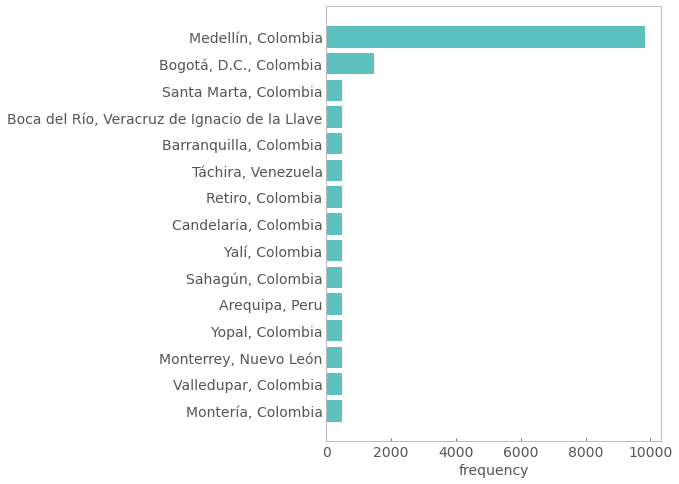

In [30]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(data_location.location, data_location.counts,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=14)


 
# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

It is to be expected that most of the tweets are located in the city of Medellin because this word was used in the search. However, scattered locations were found that also refer to the target city. As an example, a tweet was extracted from the city of Arequipa, Peru and this was the result: "Now that they just gave us 3 goals, with Guerrero included, I'm going to uncork a Medellin and prepare a cuba while listening to Janis. Have a good night". The curious thing is that when he refers to Medellín he is not alluding to the city but to Ron Medellín liquor. This only corroborates that a word without context can lead us to unexpected results.

In [31]:
data_tweet[data_tweet['location']=='Arequipa, Peru'].values[1]

array([' Ahora que acaban de meternos 3 pepas, con Guerrero incluíso, voy a destapar un Medellín y prepararme un cuba mientras escucho a Janis. Que tengan buenas noches.',
       'stanley_vega', 'Arequipa, Peru', '2019-06-09 23:58:39+00:00',
       1137871661586354176, 0, 1, 0, 1137871661586354176, 27, 161],
      dtype=object)

#### Tweet understanding

In [32]:
# import shape for our word cloud
char_mask = np.array(Image.open('figures/twitter.png'))

# figure size in inches
sns.set(rc={'figure.figsize':(5,16)})

# function to plot th word cloud

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(179, 44%%, %d%%)" % random.randint(30, 70)

def plot_word_cloud(char_mask, word_fre):
  # generating the wordcloud
  wordcloud = WordCloud(background_color='white',
                        mask=char_mask,
                        contour_color="#1C2541",
                        contour_width=3,
                        max_words=2000).generate_from_frequencies(word_fre)
  # plotting the WordCloud
  # plot the word cloud 
  #0C1821
  #1B2A41
  #1C2541
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")

  #to remove axis value
  plt.axis('off')
  plt.show()

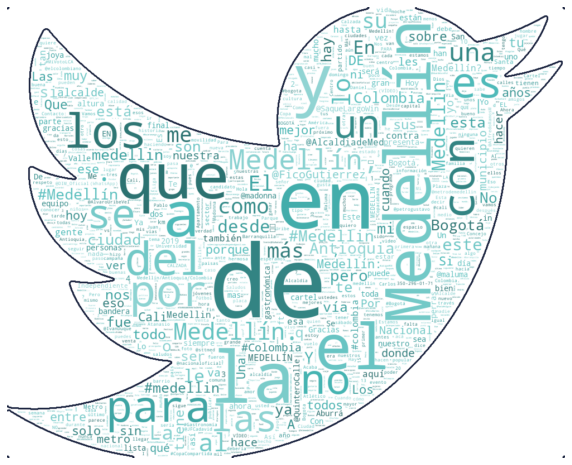

In [33]:
word_tweet_cloud=[]
for tweet in data_tweet['full_text']:
    for words in tweet.split():
        word_tweet_cloud.append(words)
word_fre = FreqDist(word_tweet_cloud)
plot_word_cloud(char_mask, word_fre)

In [34]:
word_fre.most_common(30)

[('de', 19476),
 ('en', 12652),
 ('la', 9478),
 ('y', 8241),
 ('que', 7226),
 ('Medellín', 7177),
 ('a', 7169),
 ('el', 7073),
 ('los', 3381),
 ('del', 3251),
 ('con', 3155),
 ('por', 3010),
 ('para', 2990),
 ('es', 2859),
 ('no', 2719),
 ('se', 2604),
 ('un', 2415),
 ('las', 2151),
 ('Medellín,', 2031),
 ('una', 1683),
 ('al', 1599),
 ('lo', 1507),
 ('.', 1487),
 ('Medellín.', 1374),
 ('-', 1191),
 ('El', 1142),
 ('su', 1118),
 ('como', 1114),
 ('me', 1114),
 ('más', 1076)]

In [35]:
dict_to_df = {'word':[],'frequency':[]}
for key, value in word_fre.items():
  dict_to_df['word'].append(key)
  dict_to_df['frequency'].append(value)

# create a Df with th efrequency of each word
df_words = pd.DataFrame.from_dict(dict_to_df)
df_words=df_words.sort_values(by='frequency',ascending=False).head(30).sort_values(by='frequency',ascending=True)
df_words

,word,frequency
464,más,1076
394,me,1114
72,como,1114
149,su,1118
138,El,1142
271,-,1191
140,Medellín.,1374
528,.,1487
726,lo,1507
534,al,1599


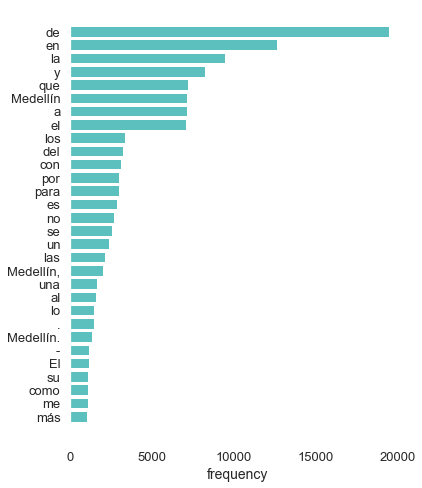

In [36]:
fig, ax = plt.subplots(figsize = (6,8))
plt.barh(df_words.word, df_words.frequency,color="#5BC0BE") # plots the number of tweets with each location

# Later in the code
ax.grid(False)
ax.set_facecolor('xkcd:white')

# setting label of y-axis
#plt.ylabel("Location")
ax.tick_params(labelsize=13) 

# setting label of x-axis
plt.xlabel("frequency",size=14)
#plt.title("")
plt.show()

When graphing the frequency of words within the text of the tweets, those that top the list are: pronouns, prepositions, definite determiners, quantifier determiners, punctuation marks and the word Medellín with its variants. These types of words are intrinsic to the use of language and hence their high recurrence, the word medellin responds to the search filter used in the API request. For our purposes, the meaning of these words would not provide more information to classify them in any sentiment. 

### Takeaways

When looking at the texts with greater word length, we highlight two points: 
1. The large use of mentions using the at-word extends the length of the tweet and would not provide relevant information for sentiment analysis so deletion could be considered.
2. Keep in mind that the word Medellín is context-dependent, that is, it will not always refer to the city, but also to the soccer team, the alcoholic beverage, as a comparison or another meaning. So we have to be careful when making conclusions and narrowing down the search. 
3. When finding different locations it is to be expected that any resident on the outside may mention the word Medellin and its different connotations, so it may not reflect problems of the city. When interpreting the results, grouping by location or only focusing on the city of Medellin could solve this limitation.
4. The words found most frequently in the text of the tweets do not seem to be determinant for a subsequent classification model. Their omission would facilitate the processing of the text that will serve as input. This stage will be extended in the text preprocessing section.